## Assignment 2 

### Onset Detector 

Sometimes its useful to find where events in a musical file occurred, these are often called **onsets**. 

They are often characterised by a **peak in the signal** of the audio. 

The simplest approach would be to record every sample above a given threshold as a new onset.

However, these **onsets** and their peaks often occur over a length of time, and so the signal may be above a chosen threshold for a number of samples, but we want to identify these as **a single event**. 

As we step through the signal (sample by sample), there are a number of rules we can apply to determine if something is a **new onset** 

### The Algorithm


1. Is the sample value larger than any of the values surrounding it (+ / - a ``window_size``)?


2. Is the sample value larger than the average of all the values surrounding it (+ / - a ``window_size``)?


3. Have we had a onset recently (within a given ``wait_time``)?


### Task 1

Code an onset detector using the algorithm described above. We have provided a template of an approach you might like to take below. 

We want to save the onsets as we go (the sample location and the value) and then plot them on the **same plot as the original waveform**

The result should look like this (with the audio data in blue and onsets in orange).

There are libraries that will find onsets for you, but we would like you to this yourself implementing the algorithm described!

![alt text](onsets.png)

In [43]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

In [44]:
audio_data, sr = librosa.load('audio/drums0.wav')

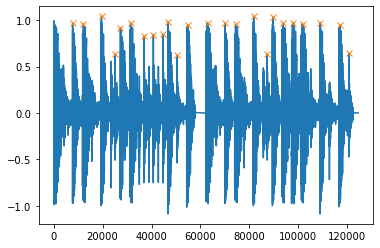

In [45]:
window_size = 2048
wait_time = 1024
sample_number=len(audio_data)
values = []
timeline = []
## for every sample (careful to account for window size at the beginning and end)
for i in range (0,sample_number-window_size):
    init=i+ window_size
    end=i+ 2*window_size
    recent_section=audio_data[init]
    slot=audio_data[i:end]

    ## if biggest sample value in surrounding area AND
    ## if sample value bigger than mean of surrounding area AND
    ## if we haven't had an onset recently THEN

    if recent_section==np.max(slot):
        values.append(recent_section)
        timeline.append(init)                
        #record time and sample value for plotting later

plt.plot(audio_data)
## plot onset times and values on same plot
plt.plot(timeline, values, "x")

### Task 2 

Experiment with different settings for the your onset detector.

Provide a short discussion (max 250 words) on the advantages and disadvantages from having longer or shorter  ``window_size``s and ``wait_time``s.

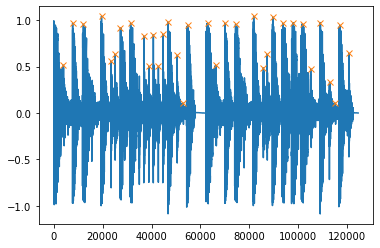

In [46]:
window_size = 1024
sample_number=len(audio_data)
values = []
timeline = []
## for every sample (careful to account for window size at the beginning and end)
for i in range (0,sample_number-window_size):
    init=i+ window_size
    end=i+ 2*window_size
    recent_section=audio_data[init]
    slot=audio_data[i:end]

    ## if biggest sample value in surrounding area AND
    ## if sample value bigger than mean of surrounding area AND
    ## if we haven't had an onset recently THEN

    if recent_section==np.max(slot):
        values.append(recent_section)
        timeline.append(init)                
        #record time and sample value for plotting later

plt.plot(audio_data)
## plot onset times and values on same plot
plt.plot(timeline, values, "x")

In [ ]:
1. The shorter the window_size, the more onset, and the finer the identification of onset.
2. The wait_time is half the window_size, so I infer that it has the same effect as window_size. The shorter the wait_time, the more onset, and the finer the identification of onset.